## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)

    print("dsda", indx)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


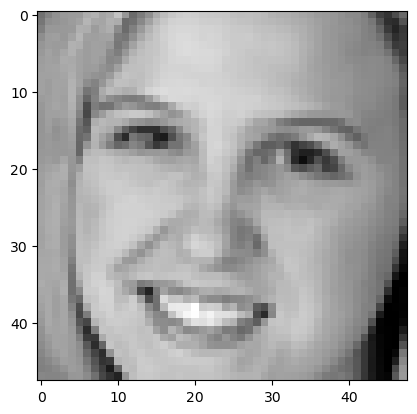

dsda 3
facial emotion: happy


In [5]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

In [6]:
def show_face(x, y, pred):
    sample_index = np.random.randint(0, x.shape[0])
    sample_image = x[sample_index]
    true_label = y[sample_index]
    predicted_label = pred[sample_index]

    sample_image_reshaped = sample_image.reshape(48, 48)
    plt.imshow(sample_image_reshaped, cmap='gray')
    plt.title(f"True: {'happy' if true_label == 0 else 'sad'}, Predicted: {'happy' if predicted_label == 0 else 'sad'}")
    plt.axis('off')
    plt.show()

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

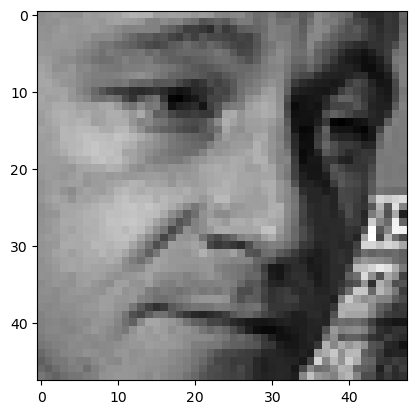

Train set - facial emotion: sad


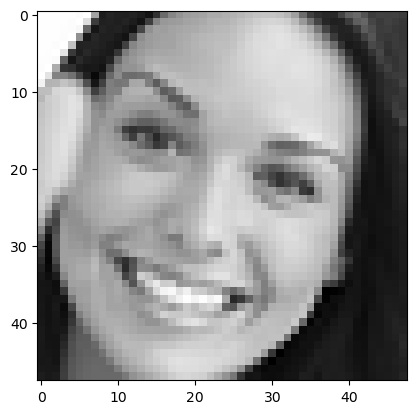

Test set - facial emotion: happy


In [7]:
selected_rows_train = np.any(y_training[:, [3, 4]], axis=1)
x_train_binary = x_training[selected_rows_train]
y_train_binary = y_training[selected_rows_train][:, [3, 4]]

selected_rows_test = np.any(y_testing[:, [3, 4]], axis=1)
x_test_binary = x_testing[selected_rows_test]
y_test_binary = y_testing[selected_rows_test][:, [3, 4]]

# 0 for happy, 1 for sad
y_train_binary = np.argmax(y_train_binary, axis=1)
y_test_binary = np.argmax(y_test_binary, axis=1)

sample_index = np.random.randint(0, x_train_binary.shape[0])

plt.imshow(x_train_binary[sample_index].reshape(48, 48), cmap='gray')
plt.show()
print('Train set - facial emotion: %s' % ("sad" if y_train_binary[sample_index] == 1 else "happy"))

sample_index_test = np.random.randint(0, x_test_binary.shape[0])

plt.imshow(x_test_binary[sample_index_test].reshape(48, 48), cmap='gray')
plt.show()
print('Test set - facial emotion: %s' % ("sad" if y_test_binary[sample_index_test] == 1 else "happy"))


In [8]:
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Fit PCA on the training data
pca = PCA()
pca.fit(x_train_original)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create Plotly figure
fig = go.Figure()

# Add a line plot for cumulative explained variance ratio
fig.add_trace(go.Scatter(
    x=np.arange(1, len(cumulative_variance_ratio) + 1),
    y=cumulative_variance_ratio,
    mode='lines+markers',
    line=dict(color='royalblue', width=2),
    marker=dict(color='royalblue', size=8),
    name='Cumulative Explained Variance Ratio'
))

# Update layout for better aesthetics and readability
fig.update_layout(
    title='Cumulative Explained Variance Ratio by Number of Components',
    xaxis_title='Number of Components',
    yaxis_title='Cumulative Explained Variance',
    hovermode='x',
    template='plotly_white'
)

# Show plot
fig.show()


NameError: name 'x_train_original' is not defined

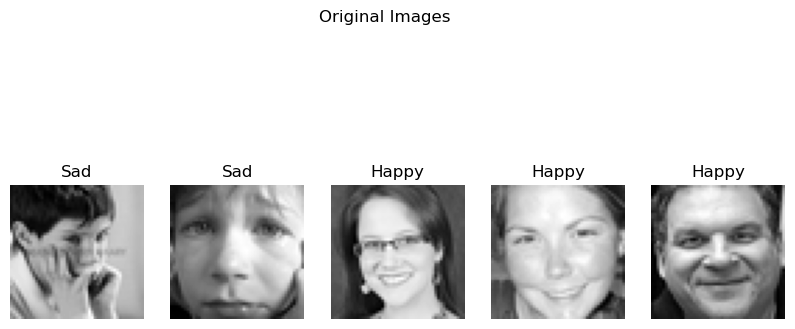

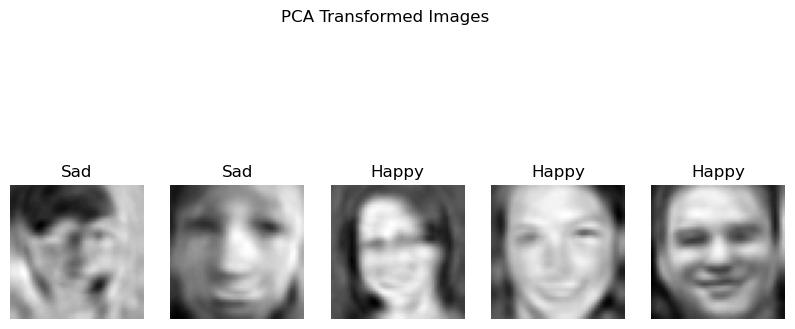

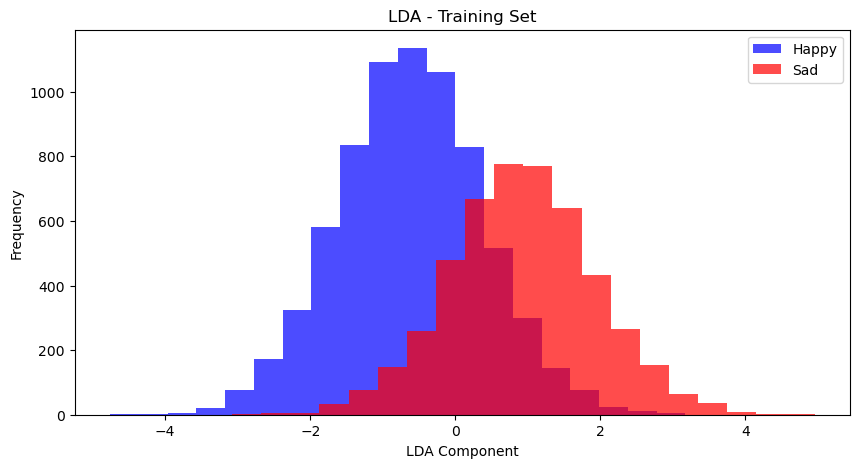

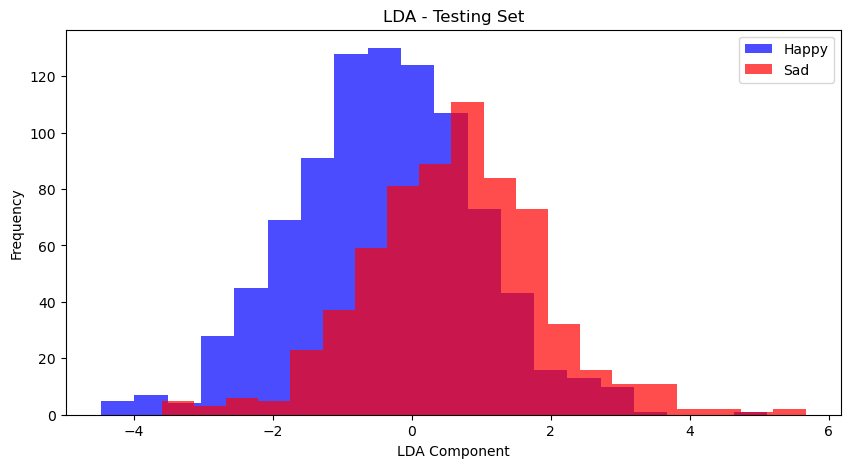

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Function to display a single face image or transformed data with its label or title
def display_data(data, labels, title):
    num_images = data.shape[0]
    plt.figure(figsize=(10, 5))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        if title.startswith('LDA'):
            plt.scatter(data[i], np.zeros_like(data[i]), c=['blue' if labels[i] == 0 else 'red'], marker='o', alpha=0.8)
            plt.title(title)
        else:
            plt.imshow(data[i].reshape(48, 48), cmap='gray')
            plt.title("Happy" if labels[i] == 0 else "Sad")
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Reshape the binary training and testing sets for PCA
x_train_original = x_train_binary.reshape(x_train_binary.shape[0], -1)
x_test_original = x_test_binary.reshape(x_test_binary.shape[0], -1)

# Perform PCA to reduce dimensionality to 150 components
pca = PCA(n_components=150)
x_train_pca = pca.fit_transform(x_train_original)
x_test_pca = pca.transform(x_test_original)

# Inverse transform the PCA results to view the images
x_train_pca_faces = pca.inverse_transform(x_train_pca).reshape(-1, 48, 48)
x_test_pca_faces = pca.inverse_transform(x_test_pca).reshape(-1, 48, 48)

# Display original images before any transformation
display_data(x_train_binary, y_train_binary, 'Original Images')

# Display PCA-transformed images
display_data(x_train_pca_faces, y_train_binary, 'PCA Transformed Images')

# Perform LDA to reduce dimensionality to 1 component
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train_original, y_train_binary)
x_test_lda = lda.transform(x_test_original)

# Plot histograms of the LDA results for the training set
plt.figure(figsize=(10, 5))
plt.hist(x_train_lda[y_train_binary == 0], bins=20, alpha=0.7, label='Happy', color='blue')
plt.hist(x_train_lda[y_train_binary == 1], bins=20, alpha=0.7, label='Sad', color='red')
plt.title('LDA - Training Set')
plt.xlabel('LDA Component')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

# Plot histograms of the LDA results for the testing set
plt.figure(figsize=(10, 5))
plt.hist(x_test_lda[y_test_binary == 0], bins=20, alpha=0.7, label='Happy', color='blue')
plt.hist(x_test_lda[y_test_binary == 1], bins=20, alpha=0.7, label='Sad', color='red')
plt.title('LDA - Testing Set')
plt.xlabel('LDA Component')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_original, y_train_binary)

y_pred_nb = naive_bayes.predict(x_test_original)

accuracy_nb = accuracy_score(y_test_binary, y_pred_nb)
print("Without PCA Accuracy:", accuracy_nb)

naive_bayes.fit(x_train_pca, y_train_binary)

y_pred_train_nb = naive_bayes.predict(x_train_pca)
accuracy_train_nb = accuracy_score(y_train_binary, y_pred_train_nb)
print("Training Accuracy:", accuracy_train_nb)

y_pred_nb = naive_bayes.predict(x_test_pca)

accuracy_nb = accuracy_score(y_test_binary, y_pred_nb)
print("Testing Accuracy:", accuracy_nb)

#show_face(x_test_original, y_test_binary, y_pred_nb)

Without PCA Accuracy: 0.5904392764857881
Training Accuracy: 0.6168534661685346
Testing Accuracy: 0.5962532299741602


In [11]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_original, y_train_binary)
y_pred_lr = log_reg.predict(x_test_original)

accuracy_log_reg = accuracy_score(y_test_binary, y_pred_lr)
print("Without PCA Accuracy:", accuracy_log_reg)

log_reg.fit(x_train_pca, y_train_binary)
y_pred_train_lr = log_reg.predict(x_train_pca)

y_pred_lr = log_reg.predict(x_test_pca)

accuracy_train_lr = accuracy_score(y_train_binary, y_pred_train_lr)
print("Training Accuracy:", accuracy_train_lr)

accuracy_lr = accuracy_score(y_test_binary, y_pred_lr)
print("Testing Accuracy:", accuracy_lr)

#show_face(x_test_original, y_test_binary, y_pred_lr)

/Users/saikiranpilli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Without PCA Accuracy: 0.648578811369509
Training Accuracy: 0.7214611872146118
Testing Accuracy: 0.725452196382429


In [12]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x_train_original, y_train_binary)
y_pred_svm = svm.predict(x_test_original)

accuracy_svm = accuracy_score(y_test_binary, y_pred_svm)
print("Without PCA Accuracy:", accuracy_svm)
svm.fit(x_train_pca, y_train_binary)

y_pred_train_svm = svm.predict(x_train_pca)

accuracy_train_svm = accuracy_score(y_train_binary, y_pred_train_svm)
print("Training Accuracy:", accuracy_train_svm)
y_pred_svm = svm.predict(x_test_pca)

accuracy_svm = accuracy_score(y_test_binary, y_pred_svm)
print("Testing Accuracy:", accuracy_svm)

#show_face(x_test_original, y_test_binary, y_pred_svm)

Without PCA Accuracy: 0.7357881136950905
Training Accuracy: 0.8445828144458282
Testing Accuracy: 0.7428940568475452


#### I believe the Support Vector Machine (SVM) is the most suitable algorithm for classifying the happy and sad faces. Using the radial basis function (RBF) kernel resulted in faster model execution. Upon analyzing the outputs, in comparison to Logistic Regression and Gaussian models, SVM demonstrates superior performance, yielding the highest accuracy

In [13]:
def show_faces(x, y, pred):
    happy_faces = np.where(y == 0)[0]
    sad_faces = np.where(y == 1)[0]
    plt.figure(figsize=(15, 5))

    for i in range(5):
        sample_index = happy_faces[i]
        sample_image = x[sample_index]
        true_label = y[sample_index]
        predicted_label = pred[sample_index]

        sample_image_reshaped = sample_image.reshape(48, 48)
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(sample_image_reshaped, cmap='gray')
        plt.title(f"True: {'happy' if true_label == 0 else 'sad'}, Predicted: {'happy' if predicted_label == 0 else 'sad'}")
        plt.axis('off')

    for i in range(5):
        sample_index = sad_faces[i]
        sample_image = x[sample_index]
        true_label = y[sample_index]
        predicted_label = pred[sample_index]

        sample_image_reshaped = sample_image.reshape(48, 48)
        ax = plt.subplot(2, 5, 5 + i + 1)
        plt.imshow(sample_image_reshaped, cmap='gray')
        plt.title(f"True: {'happy' if true_label == 0 else 'sad'}, Predicted: {'happy' if predicted_label == 0 else 'sad'}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Sample happy and sad faces using Support Vector Machines

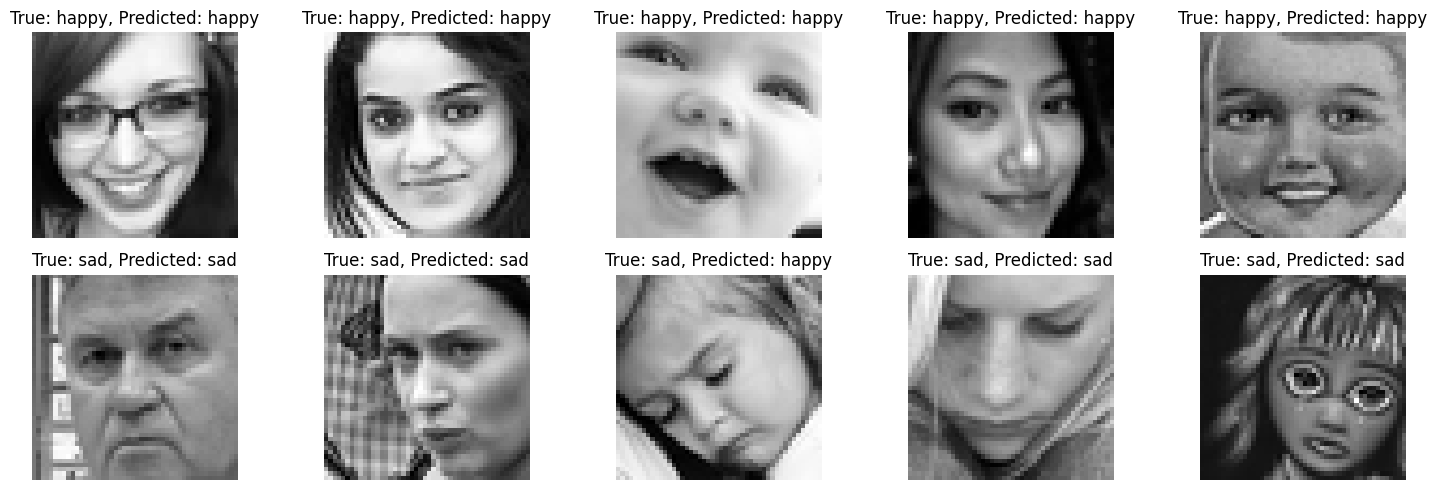

In [14]:
show_faces(x_test_original, y_test_binary, y_pred_svm)

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes.

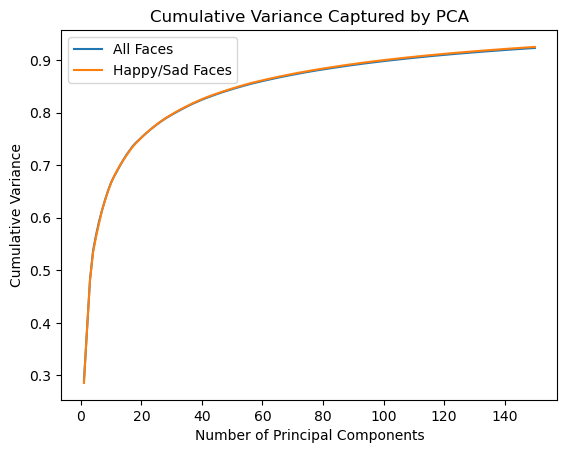

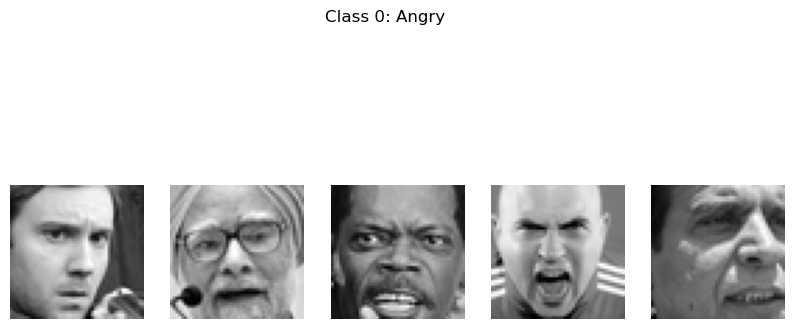

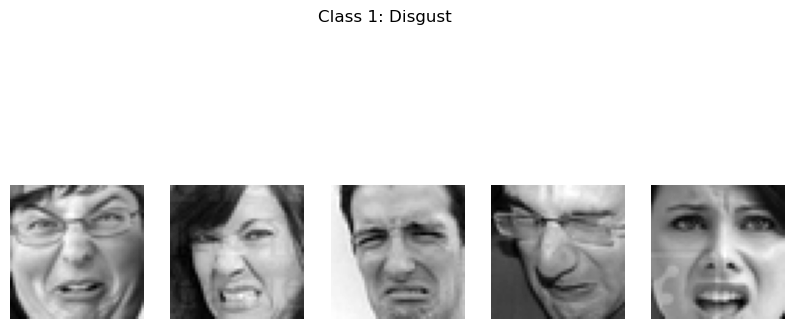

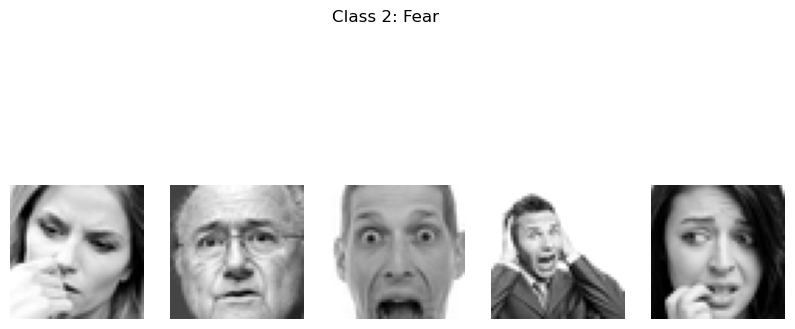

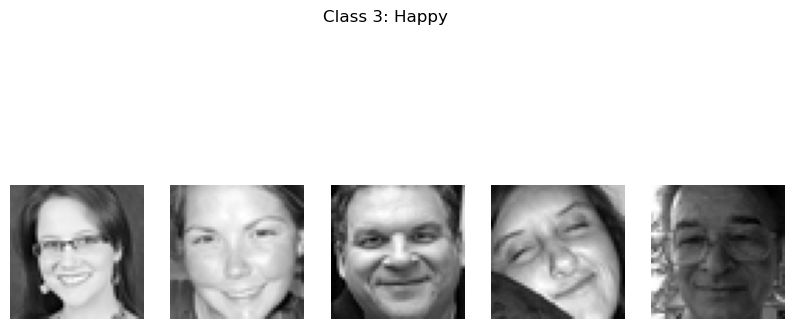

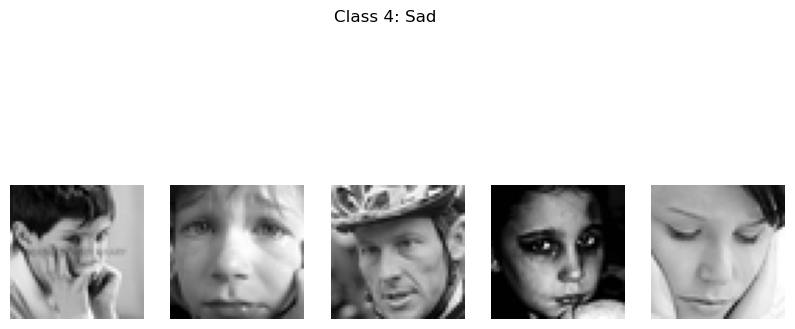

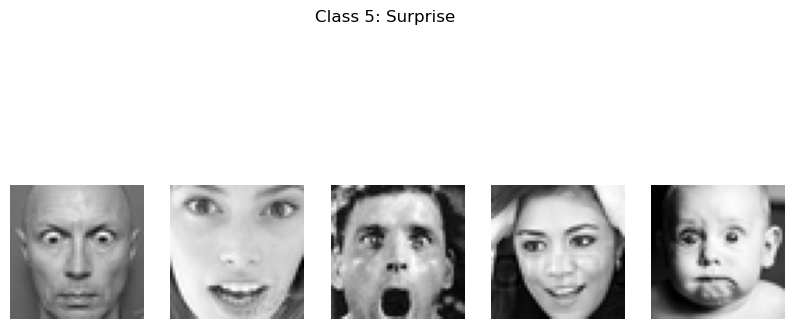

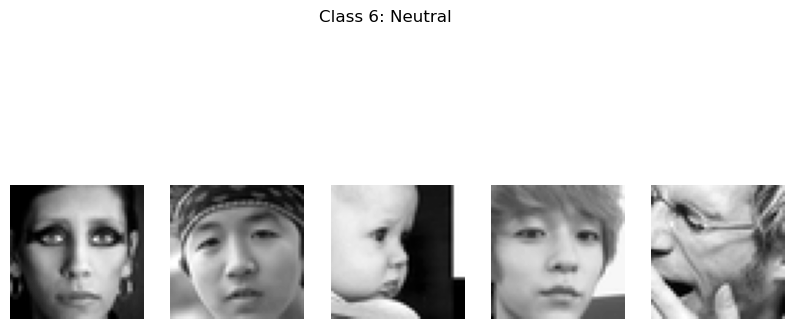

In [9]:
x_train_original = x_training.reshape(x_training.shape[0], -1)
x_test_original = x_testing.reshape(x_testing.shape[0], -1)
y_training_flat = np.argmax(y_training, axis=1)


pca = PCA(n_components = 150)
pca.fit(x_train_original)


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, label="All Faces")


x_train_binary_original = x_train_binary.reshape(x_train_binary.shape[0], -1)
x_test_binary_original = x_test_binary.reshape(x_test_binary.shape[0], -1)

pca_binary = PCA(n_components = 150)
pca_binary.fit(x_train_binary_original)

cumulative_variance_binary = np.cumsum(pca_binary.explained_variance_ratio_)


plt.plot(range(1, len(cumulative_variance_binary) + 1), cumulative_variance_binary, label="Happy/Sad Faces")


plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.title("Cumulative Variance Captured by PCA")
plt.legend()
plt.show()


lda = LDA(n_components=6)
x_train_lda = lda.fit_transform(x_train_original, y_training_flat)
x_test_lda = lda.transform(x_test_original)


def get_emotion(label):
    emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
    return emotions[label]
for i in range(7):
      class_faces = x_train_original[y_training_flat == i]
      class_faces_reshaped = class_faces.reshape(-1, 48, 48)
      plt.figure(figsize=(10, 5))
      for j in range(5):
         plt.subplot(1, 5, j + 1)
         plt.imshow(class_faces_reshaped[j], cmap='gray')
         plt.axis('off')
      plt.suptitle(f"Class {i}: {get_emotion(i)}")
      print('\n')
      plt.show()

In [16]:



y_training_flat = np.argmax(y_training, axis=1)
y_testing_flat = np.argmax(y_testing, axis=1)

naive_bayes = GaussianNB()
naive_bayes.fit(x_train_original, y_training_flat)

y_pred_nb = naive_bayes.predict(x_test_original)

accuracy_nb = accuracy_score(y_testing_flat, y_pred_nb)
print("Accuracy:", accuracy_nb)


Accuracy: 0.22736138200055725


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Ans: The multi-class nature of the problem is treated by the Naive Bayes classifier by using a one-vs-rest approach.
In this approach, a separate binary classifier is trained for each class against all other classes combined.
During prediction, the classifier with the highest probability score for a given input is chosen as the predicted class.


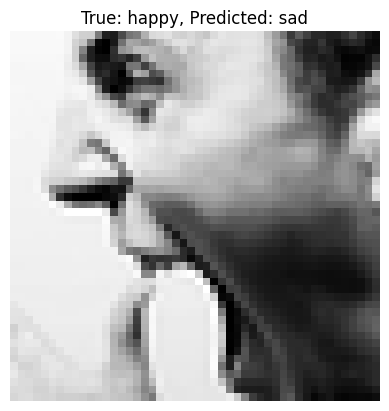

In [17]:
show_face(x_test_original, y_testing_flat, y_pred_nb)

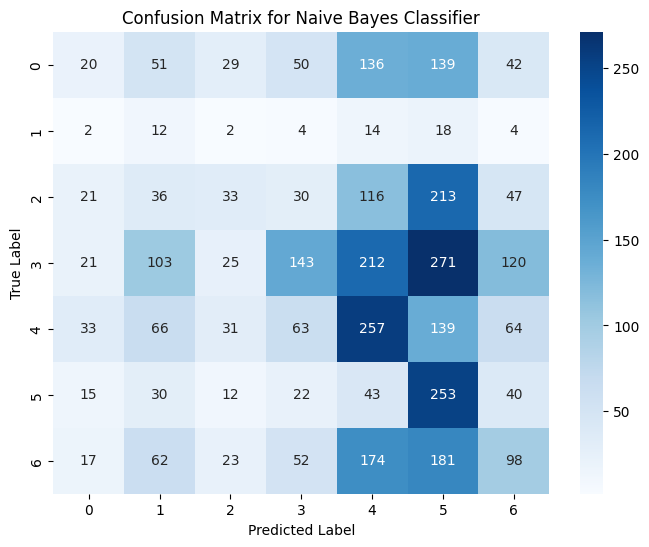

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(y_testing_flat, y_pred_nb)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [19]:


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_original, y_training_flat)

y_pred_lr = log_reg.predict(x_test_original)

accuracy_log_reg = accuracy_score(y_testing_flat, y_pred_lr)
print("Accuracy:", accuracy_log_reg)


Accuracy: 0.33324045695179716


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


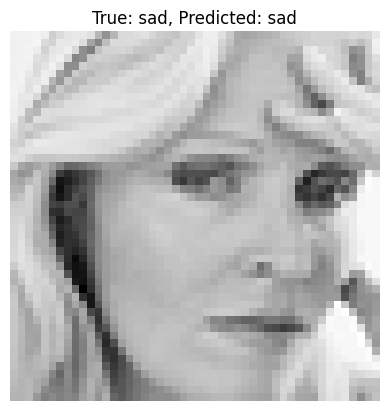

In [20]:
show_face(x_test_original, y_testing_flat, y_pred_lr)

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Ans: The multi-class nature of the problem is treated by the Logistic Regression classifier using a one-vs-rest approach.
In this approach, a separate binary classifier is trained for each class against all other classes combined.
During prediction, the classifier with the highest probability score for a given input is chosen as the predicted class.

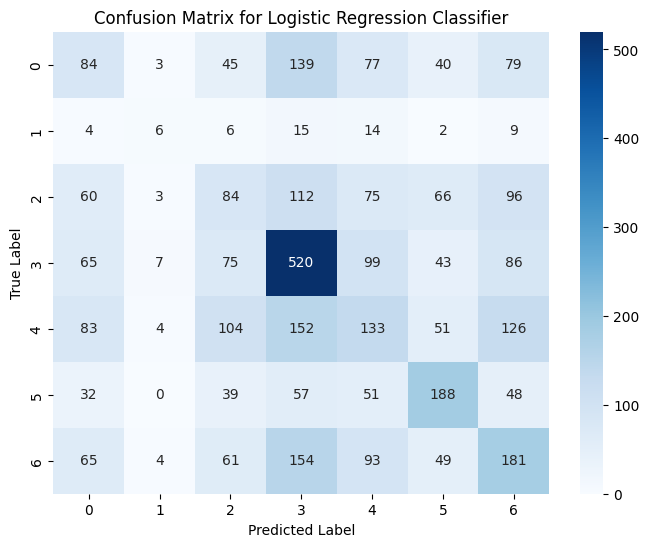

In [21]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_testing_flat, y_pred_lr)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

In [22]:


svm = SVC(kernel='rbf', random_state=42)
svm.fit(x_train_original, y_training_flat)

y_pred_svm = svm.predict(x_test_original)

accuracy_svm = accuracy_score(y_testing_flat, y_pred_svm)
print("Accuracy:", accuracy_svm)


Accuracy: 0.44664251880746725


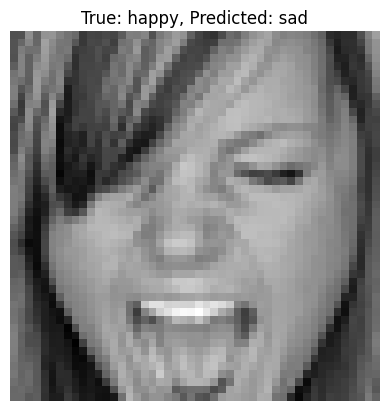

In [23]:
show_face(x_test_original, y_testing_flat, y_pred_svm)

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

ANS: The multi-class nature of the problem is treated by the Support Vector Machine classifier using a one-vs-one approach.
In this approach, a separate binary classifier is trained for each pair of classes.
During prediction, the classifier with the highest score for a given input is chosen as the predicted class.


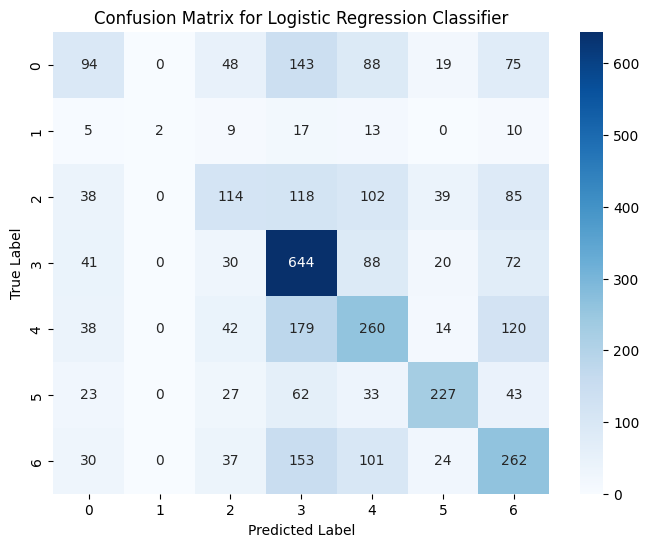

In [24]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_testing_flat, y_pred_svm)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

Answer:
Based on the confusion matrix, we can see that the following categories of faces seem to be most similar:

Happy and surprised

Angry and disgusted

Fearful and sad

The following categories of faces seem to be least similar:

Happy and angry

Happy and fearful

Surprised and disgusted


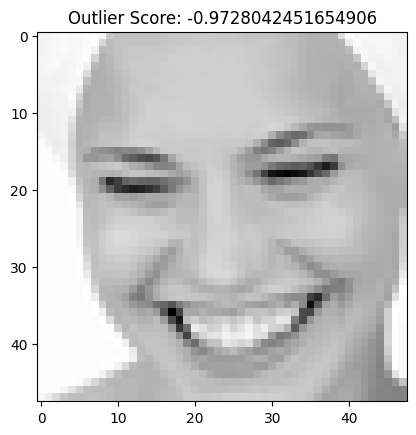

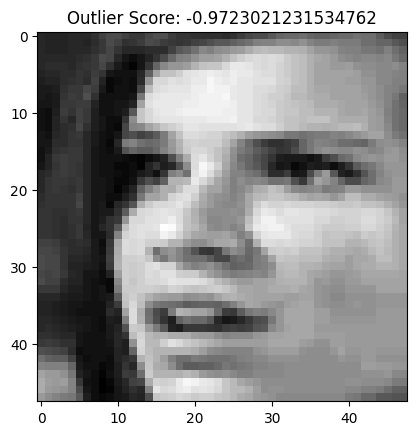

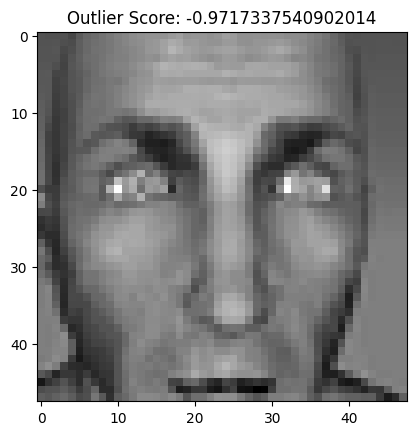

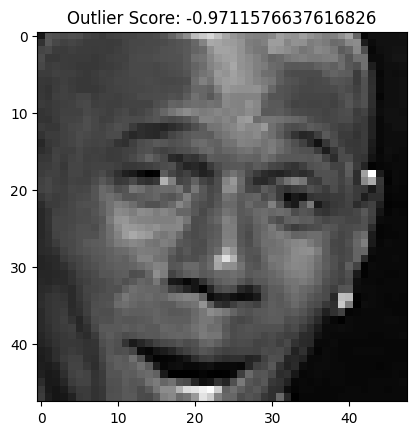

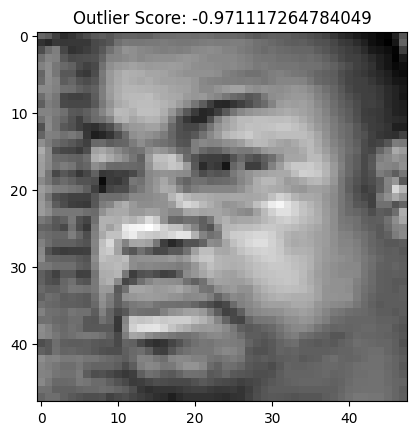

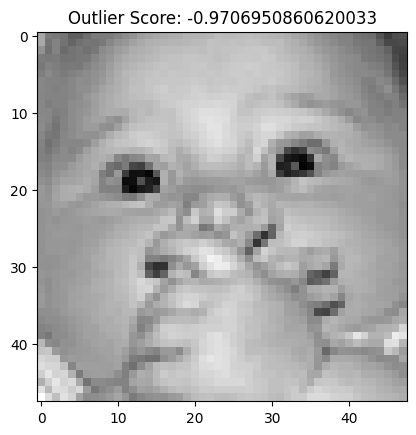

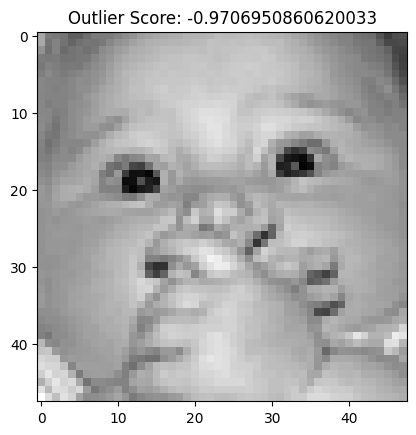

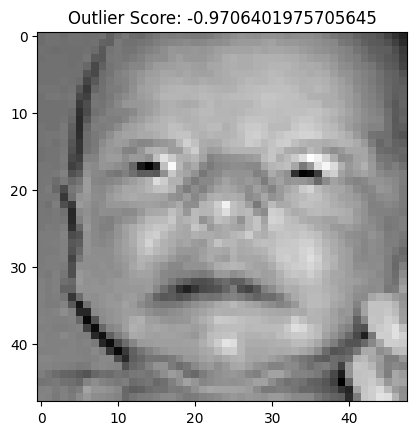

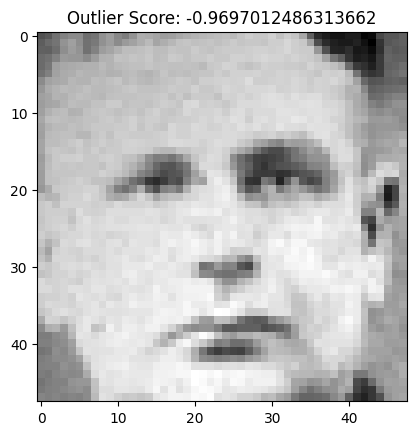

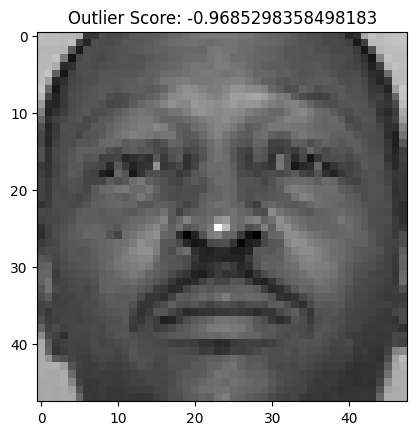

In [25]:
from sklearn.neighbors import LocalOutlierFactor




lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof.fit(x_train_original)


outlier_scores = lof.negative_outlier_factor_


outlier_indices = np.argsort(outlier_scores)[-10:]


for i in outlier_indices:
    if i < len(x_train_original):
      sample_image = x_train_original[i].reshape(48, 48)

      plt.imshow(sample_image, cmap='gray')
      plt.title(f"Outlier Score: {outlier_scores[i]}")

      plt.show()
    else:


      print(f"Index {i} is out of bounds for x_train_original with size {len(x_train_original)}")